In [25]:
%pylab inline

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from matplotlib.patches import Polygon
import scipy.stats

DATADIR="/storage/mgymrek/ssc-imputation/snpstr-ld"
OUTPATH="pdfs/"
WINDOW=50000
BINSIZE=500

snpsnp = pd.read_csv(os.path.join(DATADIR, "snp_pairwise_ld.tab"), sep="\t")
snpstr = pd.read_csv(os.path.join(DATADIR, "snp_str_ld.tab"), sep="\t", names=["chrom","strpos","snppos","distance","r2"])

Populating the interactive namespace from numpy and matplotlib


# Figure 2A: SNP-SNP vs. SNP-STR LD

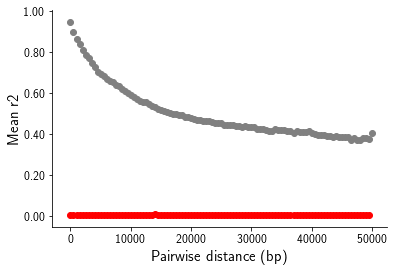

In [27]:
snpsnp["distbin"] = (snpsnp["distance"]/BINSIZE).apply(int)
snpsnp_bins = snpsnp.groupby("distbin", as_index=False).agg({"r2": np.mean})

snpstr["distbin"] = (snpstr["distance"].apply(abs)/BINSIZE).apply(int)
snpstr_bins = snpstr.groupby("distbin", as_index=False).agg({"r2": np.mean})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(snpsnp_bins["distbin"]*BINSIZE, snpsnp_bins["r2"], color="gray");
ax.scatter(snpstr_bins["distbin"]*BINSIZE, snpstr_bins["r2"], color="red");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("Pairwise distance (bp)", size=15)
ax.set_ylabel("Mean r2", size=15)
ax.set_xticklabels([int(x) for x in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.2f"%(x) for x in ax.get_yticks()], size=12);
fig.savefig(os.path.join(OUTPATH, "Figure2_SnpStrLD.pdf"))